In [1]:
DATA_DIR = "/Volumes/2TB_SSD/ML_Projects/Eyesea/sample_data"


In [2]:
from pathlib import Path
from time import sleep

from fastai.vision.all import (
    Image, download_images, resize_images,
    verify_images, get_image_files,
    vision_learner, ImageBlock, CategoryBlock, Resize,
    resnet18, error_rate
)
from fastai.vision.core import DataBlock, RandomSplitter, parent_label, PILImage

In [3]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),  # The input and output types
    get_items=get_image_files,  # Function that returns a list of all inputs
    splitter=RandomSplitter(valid_pct=0.2, seed=42),  # How to split the training/validation set
    get_y=parent_label,  # Function that retuns the label of a given image
    item_tfms=[Resize(192, method='squish')],  # Pre-processing transforms to apply to the input images
)

In [4]:
DataBlock?

Init signature:
DataBlock(
    blocks: 'list' = None,
    dl_type: 'TfmdDL' = None,
    getters: 'list' = None,
    n_inp: 'int' = None,
    item_tfms: 'list' = None,
    batch_tfms: 'list' = None,
    *,
    get_items=None,
    splitter=None,
    get_y=None,
    get_x=None,
)
Docstring:      Generic container to quickly build `Datasets` and `DataLoaders`.
File:           ~/miniconda3/envs/eyesea/lib/python3.10/site-packages/fastai/data/block.py
Type:           type
Subclasses:     

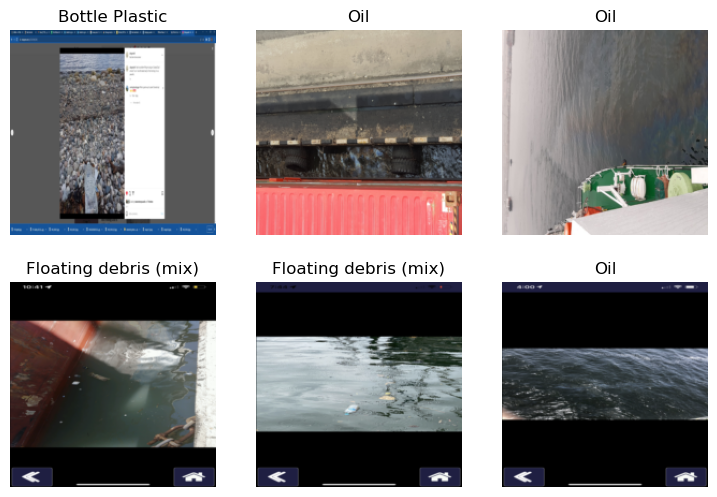

In [5]:
dls = dblock.dataloaders(DATA_DIR, bs=32)
dls.show_batch(max_n=6)

In [6]:
learner = vision_learner(dls, resnet18, metrics=error_rate)
learner.fine_tune(5)

In [24]:
test_destination_path = Path("/Volumes/2TB_SSD/ML_Projects/Eyesea/sample_data_full/Mix")
test_destination_path

Path('/Volumes/2TB_SSD/ML_Projects/Eyesea/sample_data_full/Mix')

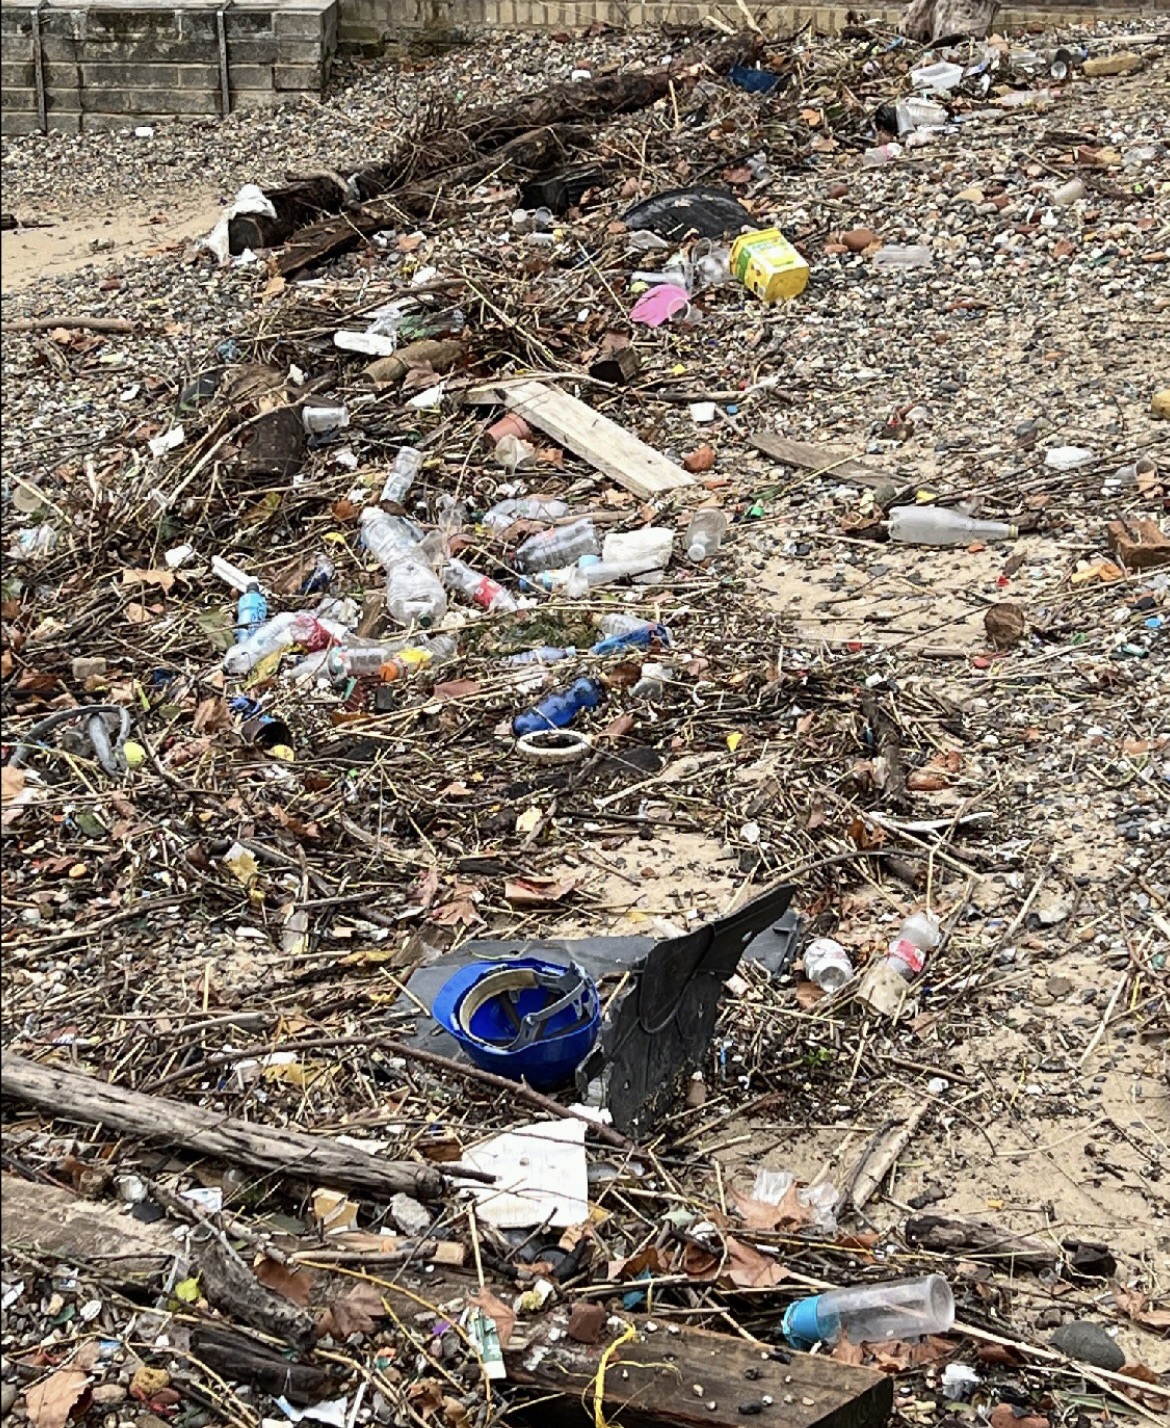

In [32]:
test_img = PILImage.create(test_destination_path.ls()[6])
test_img

In [33]:
learner.predict(test_img)

('Lobster Band',
 tensor(6),
 tensor([2.4945e-02, 8.2377e-03, 8.5606e-02, 6.0167e-02, 4.6865e-03, 4.4287e-04,
         4.1193e-01, 2.8526e-04, 3.5211e-03, 3.4048e-01, 1.2222e-02, 9.6957e-04,
         4.6511e-02]))